In [18]:
# Importing libraries

import pandas as pd # type: ignore
import pandasql # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

%matplotlib inline

In [19]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max.rows', 100)
pd.set_option('display.max.columns', 10)

In [20]:
# Importing dataset

df = pd.read_csv(r"C:\Users\Me\Desktop\Data Analysis\Datasets\ADAP.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-06,19.25,19.50,15.51,16.00,16.00,8301700
1,2015-05-07,15.75,17.25,15.75,17.23,17.23,1766500
2,2015-05-08,17.25,17.69,16.59,17.18,17.18,884100
3,2015-05-11,17.47,17.47,16.86,17.00,17.00,240500
4,2015-05-12,17.00,17.05,16.75,16.88,16.88,338300
5,2015-05-13,16.85,17.01,16.84,16.94,16.94,342300
6,2015-05-14,17.08,17.08,16.85,16.93,16.93,373200
7,2015-05-15,17.01,17.09,16.80,16.85,16.85,610200
8,2015-05-18,16.88,17.15,16.60,16.61,16.61,318500
9,2015-05-19,16.50,16.66,15.91,15.98,15.98,288400


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1236 non-null   object 
 1   Open       1236 non-null   float64
 2   High       1236 non-null   float64
 3   Low        1236 non-null   float64
 4   Close      1236 non-null   float64
 5   Adj Close  1236 non-null   float64
 6   Volume     1236 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [22]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1236.00,1236.00,1236.00,1236.00,1236.00,1236.00
mean,7.30,7.56,7.04,7.28,7.28,414180.02
std,3.98,4.10,3.85,3.96,3.96,1761023.77
min,0.74,0.80,0.71,0.73,0.73,28300.00
25%,4.31,4.48,4.15,4.31,4.31,148250.00
50%,7.10,7.27,6.90,7.08,7.08,246900.00
75%,9.50,9.90,9.06,9.46,9.46,409425.00
max,21.32,21.57,20.05,21.12,21.12,56057700.00


In [23]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      2015-05-06
1      2015-05-07
2      2015-05-08
3      2015-05-11
4      2015-05-12
          ...    
1231   2020-03-26
1232   2020-03-27
1233   2020-03-30
1234   2020-03-31
1235   2020-04-01
Name: Date, Length: 1236, dtype: datetime64[ns]

## Data Visualization

In [24]:
plt.style.use(style='seaborn-v0_8-dark-palette')

<Axes: title={'center': 'Closing Stock Price over Time'}, xlabel='Date', ylabel='Closing Stock Price'>

<Figure size 1000x1000 with 0 Axes>

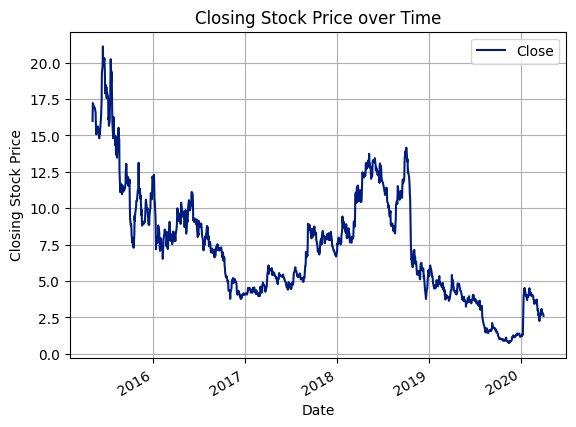

In [25]:
plt.figure(figsize=(10, 10))
df.plot(kind = 'line', x = 'Date', y = 'Close', title = 'Closing Stock Price over Time', grid = True, ylabel = 'Closing Stock Price')

Close    Axes(0.125,0.11;0.775x0.77)
dtype: object

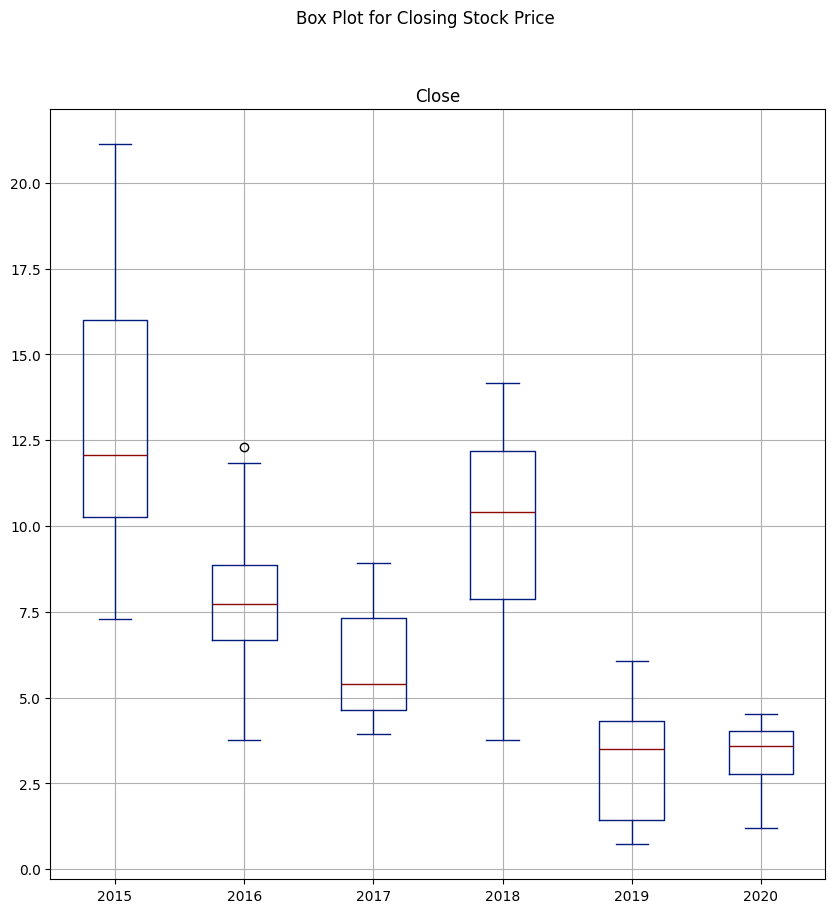

In [26]:
df['Year'] = df['Date'].dt.year
df.plot.box(by = 'Year', column = 'Close', figsize=(10,10), title = 'Box Plot for Closing Stock Price', grid = True)

<Axes: xlabel='Close', ylabel='Count'>

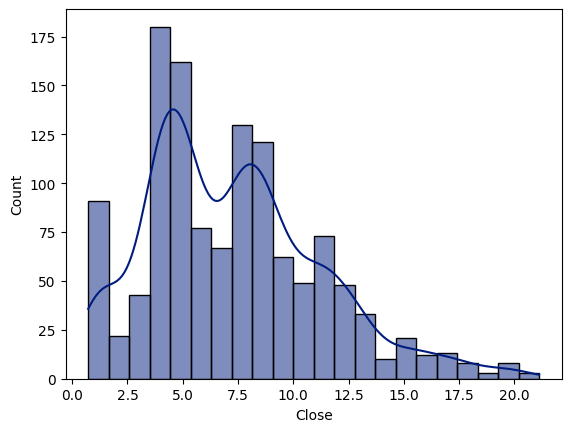

In [28]:
sns.histplot(df['Close'], kde=True)

In [38]:
# Importing stocks from other companies

gff = pd.read_csv(r"C:\Users\Me\Desktop\Data Analysis\Datasets\GFF.csv")
trq = pd.read_csv(r"C:\Users\Me\Desktop\Data Analysis\Datasets\TRQ.csv")

In [39]:
gff['Date'] = pd.to_datetime(gff['Date'])
trq['Date'] = pd.to_datetime(trq['Date'])

In [40]:
gff.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1973-05-03,19.32,21.59,19.32,20.45,17.53,600
1,1973-05-04,20.45,21.59,20.45,21.59,18.50,200
2,1973-05-07,21.59,22.73,20.45,21.59,18.50,900
3,1973-05-08,21.59,21.59,19.32,19.32,16.55,200
4,1973-05-09,19.32,21.59,19.32,19.32,16.55,100
5,1973-05-10,19.32,20.45,19.32,19.32,16.55,0
6,1973-05-11,19.32,20.45,19.32,19.32,16.55,0
7,1973-05-14,19.32,19.32,18.18,18.18,15.58,0
8,1973-05-15,18.18,19.32,18.18,18.18,15.58,600
9,1973-05-16,18.18,19.32,18.18,18.18,15.58,700


In [41]:
trq.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-11-18,7.39,7.47,7.09,7.34,7.34,1944300
1,2003-11-19,7.47,7.54,6.82,6.86,6.86,1183100
2,2003-11-20,6.87,6.95,6.19,6.27,6.27,1028000
3,2003-11-21,6.20,6.27,5.67,6.00,6.00,2821500
4,2003-11-24,5.80,6.48,5.70,6.41,6.41,1091600
5,2003-11-25,6.90,7.07,6.54,6.71,6.71,2205800
6,2003-11-26,6.93,6.97,6.74,6.82,6.82,960200
7,2003-11-28,7.44,7.47,6.86,6.94,6.94,371900
8,2003-12-01,7.19,7.31,6.63,6.67,6.67,2214700
9,2003-12-02,6.61,6.81,6.41,6.70,6.70,1207600


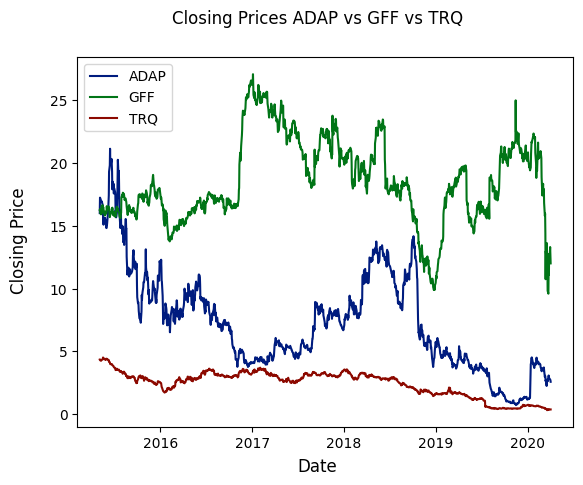

<Figure size 1000x500 with 0 Axes>

In [102]:
fig, ax = plt.subplots()

plt.figure(figsize=(10,5))
ax.plot(df['Date'], df['Close'], label='ADAP')
ax.plot(df['Date'], gff[gff['Date'] >= df['Date'].values[0]]['Close'], label='GFF')
ax.plot(df['Date'], trq[trq['Date'] >= df['Date'].values[0]]['Close'], label='TRQ')
ax.legend(loc='upper left')
fig.suptitle('Closing Prices ADAP vs GFF vs TRQ')
fig.supxlabel('Date')
fig.supylabel('Closing Price')
plt.show()

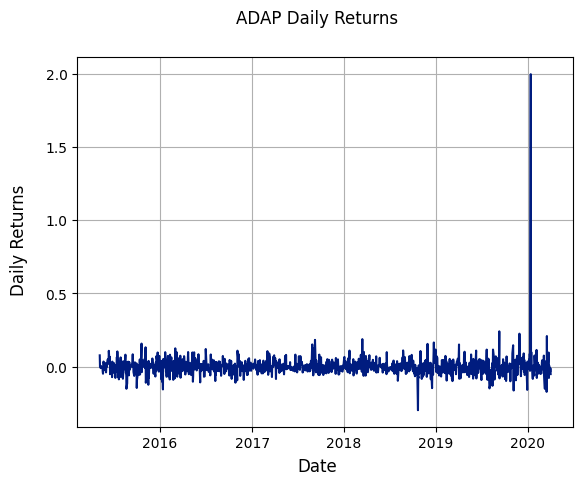

In [111]:
daily_returns = df['Close'].pct_change()

fig, ax = plt.subplots()

ax.plot(df['Date'], daily_returns.values)
fig.suptitle('ADAP Daily Returns')
fig.supxlabel('Date')
fig.supylabel('Daily Returns')
ax.grid(visible=True)
plt.show()